In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
%matplotlib inline

# Распределение Рэлея
В питоне реализована версия распределения Рэлея с параметром сигма = 1. Увы сигму нельзя задать,
и при этом значении распределение похоже на нормальное. 

Ссылка на википедию:
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F

Генерация выборки объема 1000

In [2]:
reyleighDistr = sts.rayleigh()
sample = reyleighDistr.rvs(1000)

/home/vikalin/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


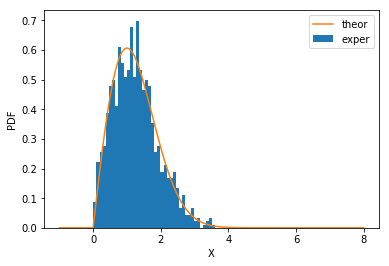

In [3]:
plt.hist(sample,bins=40,normed=True,label='exper')
plt.ylabel('PDF')
plt.xlabel('X')

x = np.linspace(-1,8,1000)
pdf = reyleighDistr.pdf(x)
plt.plot(x,pdf,label='theor')
plt.legend()

In [4]:
#генерация массива выборочных средних для 1000 выборок объема N
def genN(N):
    distMeanMatr = np.zeros([1000])
    dist = sts.rayleigh()
    
    for i in range(1000):
        distMeanMatr[i] = np.array(dist.rvs(N)).mean()
    return distMeanMatr

#генерация нормального распределения для выборочных средних из 1000 выборок объема N
def getNormDistr(N):
    mu = (pi/2)**0.5
    disp = (2 - pi/2)/N
    return sts.norm(mu,disp**0.5)

In [5]:
#рисует гистограму мыборочных средних для 1000 выборок объема N
def plotMeans(N):
    plt.hist(genN(N),bins=50,normed=True,label='means from '+str(N))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('PDF')

#делает то же, что и метод выше, но еще рисует нормальное распределение согласно ЦПТ для выборки объема N
def plotMeansAndNormDist(N):
    plt.hist(genN(N),bins=50,normed=True,label='means from '+str(N))
    x = np.linspace(0,5,100)
    plt.plot(x,getNormDistr(N).pdf(x),label='norm for '+str(N))
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('PDF')

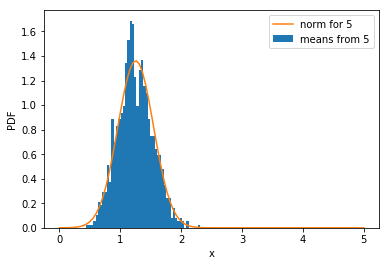

In [6]:
plotMeansAndNormDist(5)

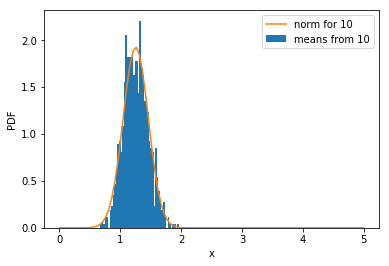

In [7]:
plotMeansAndNormDist(10)

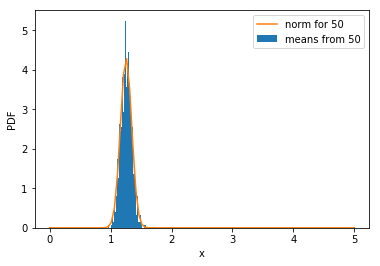

In [8]:
plotMeansAndNormDist(50)

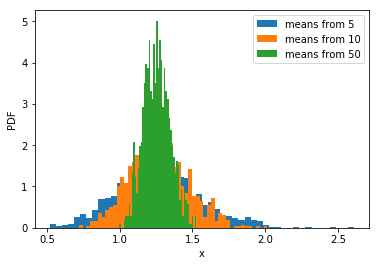

In [9]:
plotMeans(5)
plotMeans(10)
plotMeans(50)

Если бы распределение сильно отличалось от нормального, то при малых объемах гистограмы выборочных средних 
отличались от норм распределения, при увеличении объема - почти совпадало с норм распределением из ЦПТ